# Factors affeting stundent performance and
# Outcome prediction

### (In the making)

#### This project focuses on analyzing student behavior and study patterns with specific objectives. It aims to explore demographic characteristics associated with test success, evaluate study effectiveness, uncover dataset trends, and provide insightful analyses on their implications.

#### Additionally, the project seeks to build a predictive model to forecast students' likelihood of passing the test. The resulting findings will be disseminated, accompanied by recommendations to improve support strategies for helping more students pass. The ultimate goal is to enhance the accuracy of predictive models by leveraging insights gleaned from this research.

## About this dataset

The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.

1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.

|Column Name| Description|Values|Datatype|
|:------------|:------------|:--------------|:------------------------
|id| Student ID|-|Integer|
|age| Age of the student|1: 18-21, 2: 22-25, 3: above 26|Categorical|
|gender| Gender of the student|1: female, 2: male|Binary|
|hs_type| Graduated high-school type|1: private, 2: state, 3: other|Categorical|
|sch_type| Scholarship type|1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full|Categorical|
|work| Additional work|1: Yes, 2: No|Binary|
|ex_act| Regular artistic or sports activity|1: Yes, 2: No|Binary|
|partner| Do you have a partner |1: Yes, 2: No|Binary|
|salary| Total salary if available|1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410|Categorical|
|transp| Transportation to the university|1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other|Categorical|
|acc_type| Accomodation type in Cyprus|1: rental, 2: dormitory, 3: with family, 4: Other|Categorical|
|mo_edu| Mother's education|1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.|Categorical|
|fa_edu| Father's education|1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.|Categorical|
|n_sib| Number of sisters/brothers (if available)|1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above|Integer|
|p_stus| Parental status|1: married, 2: divorced, 3: died - one of them or both|Categorical|
|mo_occ| Mother's occupation|1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other|Categorical|
|fa_occ| Father's occupation|1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other|Categorical|
|w_hours| Weekly study hours|1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours|Categorical|
|frec_nsci| Reading frequency|1: None, 2: Sometimes, 3: Often (non-scientific books/journals)|Categorical|
|frec_sci| Reading frequency|1: None, 2: Sometimes, 3: Often (scientific books/journals)|Categorical|
|att_sem| Attendance to the seminars/conferences related to the department|1: Yes, 2: No|Binary|
|impact| Impact of your projects/activities on your success|1: positive, 2: negative, 3: neutral|Categorical|
|att| Attendance to classes|1: always, 2: sometimes, 3: never|Categorical|
|prep_stus| Preparation to midterm exams 1|1: alone, 2: with friends, 3: not applicable|Categorical|
|prep_reg| Preparation to midterm exams 2|1: closest date to the exam, 2: regularly during the semester, 3: never|Categorical|
|notes| Taking notes in classes|1: never, 2: sometimes, 3: always no|Categorical|
|listng| Listening in classes|1: never, 2: sometimes, 3: always	no|Categorical|
|interest| Discussion improves my interest and success in the course|1: never, 2: sometimes, 3: always no|Categorical|
|flip| Flip-classroom|1: not useful, 2: useful, 3: not applicable|Categorical|
|cum_s| Cumulative grade point average in the last semester|1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49|Categorical|
|cum_g| Expected Cumulative grade point average in the graduation|1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49|Categorical|
|course_id| Course ID|-|Integer|
|grade| OUTPUT Grade|0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA|Categorical|


In [1]:
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [6, 4]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, f1_score, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


# Setting random seed 
RSEED = 42
warnings.filterwarnings("ignore")

##  EDA / Analysis

In [2]:
# Reading data
df = pd.read_csv('data/DATA (1).csv')

In [3]:
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
# Renaming columns
col_names = ['id', 'age', 'gender', 'hs_type', 'sch_type', 
             'work', 'ex_act', 'partner', 'salary', 'transp',
             'acc_type', 'mo_edu', 'fa_edu', 'n_sib', 'p_stus',
             'mo_occ', 'fa_occ', 'w_hours', 'frec_nsci', 'frec_sci',
             'att_sem', 'impact', 'att', 'prep_stus', 'prep_reg','notes', 'listng',
              'interest', 'flip', 'cum_s', 'cum_g', 'course_id', 'grade']
df.columns = col_names

df['id'] = df['id'].apply(lambda x: x.strip('STUDENT')).astype(int)


In [5]:
df.head(2)

,id,age,gender,hs_type,sch_type,work,ex_act,partner,salary,transp,...,prep_stus,prep_reg,notes,listng,interest,flip,cum_s,cum_g,course_id,grade
0,1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         145 non-null    int32
 1   age        145 non-null    int64
 2   gender     145 non-null    int64
 3   hs_type    145 non-null    int64
 4   sch_type   145 non-null    int64
 5   work       145 non-null    int64
 6   ex_act     145 non-null    int64
 7   partner    145 non-null    int64
 8   salary     145 non-null    int64
 9   transp     145 non-null    int64
 10  acc_type   145 non-null    int64
 11  mo_edu     145 non-null    int64
 12  fa_edu     145 non-null    int64
 13  n_sib      145 non-null    int64
 14  p_stus     145 non-null    int64
 15  mo_occ     145 non-null    int64
 16  fa_occ     145 non-null    int64
 17  w_hours    145 non-null    int64
 18  frec_nsci  145 non-null    int64
 19  frec_sci   145 non-null    int64
 20  att_sem    145 non-null    int64
 21  impact     145 n

From here we can already see that we don't have missing values

#### Checking unique values

In [7]:
print('Unique values per column:')
print('-' * 15)
df.nunique()
#df.value_counts().count()

Unique values per column:
---------------


id           145
age            3
gender         2
hs_type        3
sch_type       5
work           2
ex_act         2
partner        2
salary         5
transp         4
acc_type       4
mo_edu         6
fa_edu         6
n_sib          5
p_stus         3
mo_occ         5
fa_occ         5
w_hours        5
frec_nsci      3
frec_sci       3
att_sem        2
impact         3
att            2
prep_stus      3
prep_reg       3
notes          3
listng         3
interest       3
flip           3
cum_s          5
cum_g          4
course_id      9
grade          8
dtype: int64

### Impact of Demographic Factors on Performance

- Does age correlate with academic performance?
- Is there a significant difference in performance between male and female students?
- Do students from different high school backgrounds (private, state, other) perform differently?
- How does having a scholarship (and its percentage) affect academic performance?
- Does having additional work affect student performance?

In [8]:
# Gender distribuition
df['gender'].value_counts()

gender
2    87
1    58
Name: count, dtype: int64

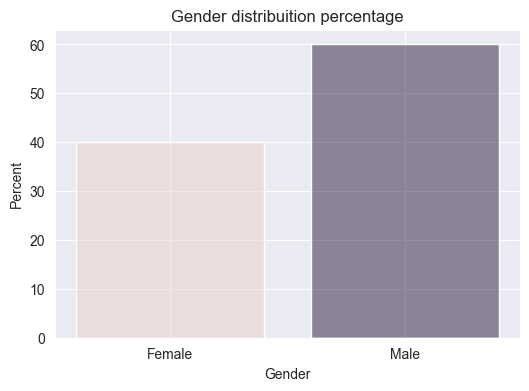

In [9]:
# Gender distribuition

fig = sns.histplot(data=df, x="gender", hue='gender', discrete=True, shrink=.8,
                    legend=False, stat='percent')

plt.title('Gender distribuition percentage')
plt.xticks(np.arange(1, 3, step=1), ['Female', 'Male'])
plt.xlabel('Gender')

plt.show()

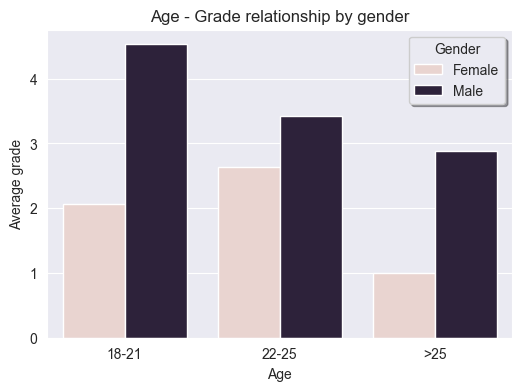

In [10]:
# Age - grades gender

fig = sns.barplot(data=df, x="age", y= 'grade', hue='gender', ci=None)#, estimator='std')

plt.title('Age - Grade relationship by gender')
plt.xticks(np.arange(0, 3, step=1), ['18-21', '22-25', '>25'])
plt.xlabel('Age')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

In [11]:
df.columns

Index(['id', 'age', 'gender', 'hs_type', 'sch_type', 'work', 'ex_act',
       'partner', 'salary', 'transp', 'acc_type', 'mo_edu', 'fa_edu', 'n_sib',
       'p_stus', 'mo_occ', 'fa_occ', 'w_hours', 'frec_nsci', 'frec_sci',
       'att_sem', 'impact', 'att', 'prep_stus', 'prep_reg', 'notes', 'listng',
       'interest', 'flip', 'cum_s', 'cum_g', 'course_id', 'grade'],
      dtype='object')

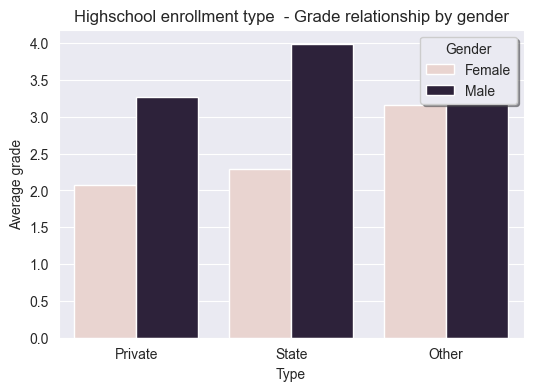

In [12]:
# Highschool - grades 

fig = sns.barplot(data=df, x="hs_type", y= 'grade', hue='gender', ci=None)

plt.title('Highschool enrollment type  - Grade relationship by gender')
plt.xticks(np.arange(0, 3, step=1), ['Private', 'State', 'Other'])
plt.xlabel('Type')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

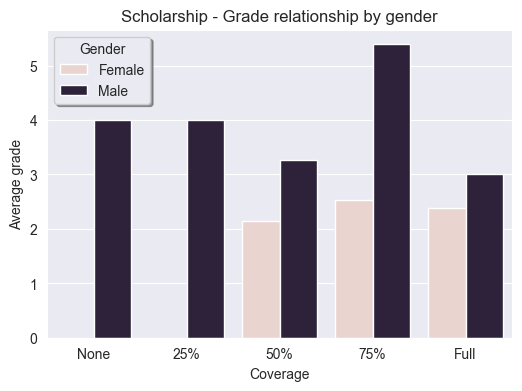

In [13]:
# Scholarship - grades 

fig = sns.barplot(data=df, x="sch_type", y= 'grade', hue='gender', ci=None)

plt.title('Scholarship - Grade relationship by gender')
plt.xticks(np.arange(0, 5, step=1), ['None', '25%', '50%', '75%', 'Full'])
plt.xlabel('Coverage')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Relationships with External Factors

- Does engagement in regular artistic or sports activities relate to academic performance?
- Is there a correlation between having a partner and academic performance?
- Do different levels of salary (if available) affect student performance?  

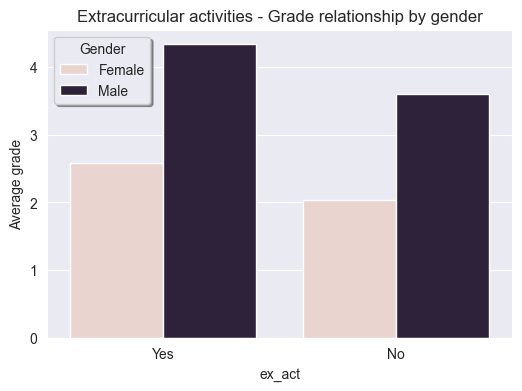

In [14]:
# Extracurricular - grades 

fig = sns.barplot(data=df, x="ex_act", y= 'grade', hue='gender', ci=None)

plt.title('Extracurricular activities - Grade relationship by gender')
plt.xticks(np.arange(0, 2, step=1), ['Yes', 'No'])
#plt.xlabel('Coverage')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

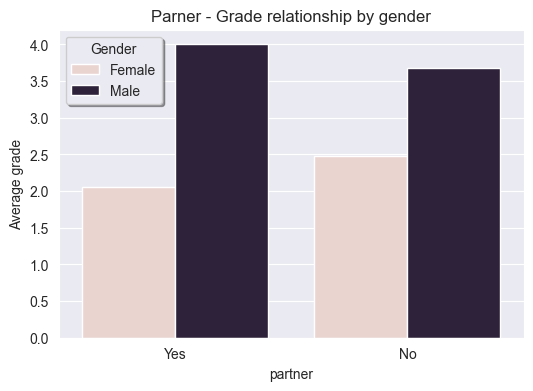

In [15]:
# Partner - grades 

fig = sns.barplot(data=df, x="partner", y= 'grade', hue='gender', ci=None)

plt.title('Parner - Grade relationship by gender')
plt.xticks(np.arange(0, 2, step=1), ['Yes', 'No'])
#plt.xlabel('Coverage')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

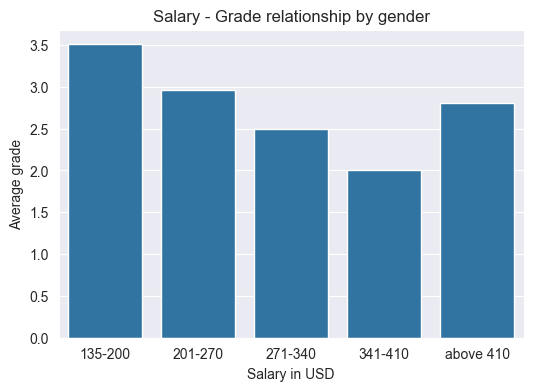

In [16]:
# Salary - grades 

fig = sns.barplot(data=df, x="salary", y= 'grade', ci=None)#, hue='gender', ci=None)

plt.title('Salary - Grade relationship by gender')
plt.xticks(np.arange(0, 5, step=1), ['135-200', '201-270', '271-340', '341-410', 'above 410'])
plt.xlabel('Salary in USD')
plt.ylabel('Average grade')
#plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Impact of Lifestyle and Study Habits

- How does the mode of transportation to the university affect academic performance?
- Does accommodation type in Cyprus influence academic performance?
- Do study hours per week correlate with academic performance?  

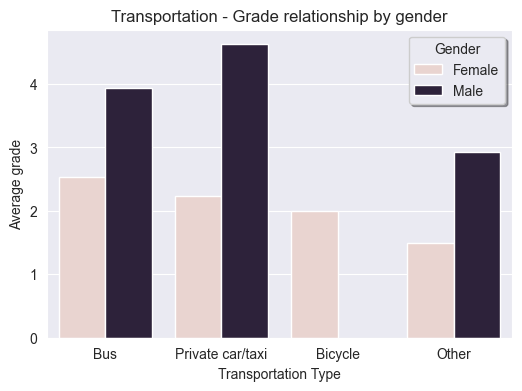

In [17]:
# Transportation - grades 

fig = sns.barplot(data=df, x="transp", y= 'grade', hue='gender', ci=None)

plt.title('Transportation - Grade relationship by gender')
plt.xticks(np.arange(0, 4, step=1), ['Bus', 'Private car/taxi', 'Bicycle', 'Other'])
plt.xlabel('Transportation Type')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

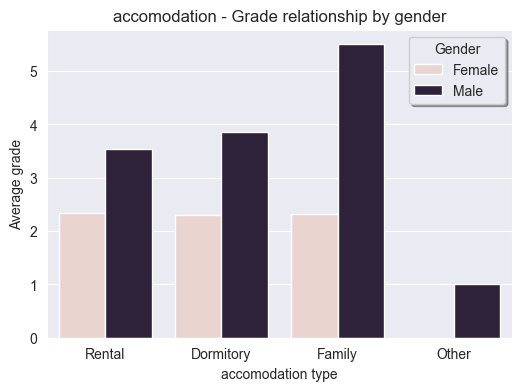

In [18]:
# accomodation type - grades 

fig = sns.barplot(data=df, x="acc_type", y= 'grade', hue='gender', ci=None)

plt.title('accomodation - Grade relationship by gender')
plt.xticks(np.arange(0, 4, step=1), ['Rental', 'Dormitory', 'Family', 'Other'])
plt.xlabel('accomodation type')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

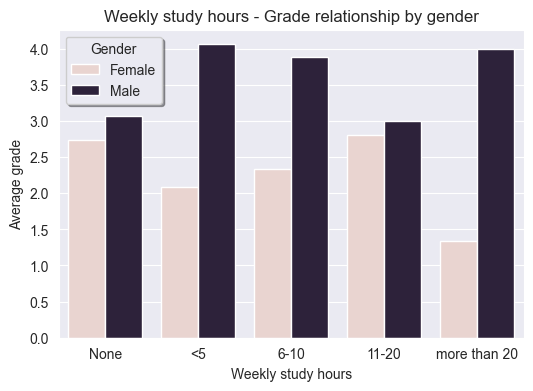

In [19]:
# Weekly study hours - grades 

fig = sns.barplot(data=df, x="w_hours", y= 'grade', hue='gender', ci=None)

plt.title('Weekly study hours - Grade relationship by gender')
plt.xticks(np.arange(0, 5, step=1), ['None', '<5', '6-10', '11-20', 'more than 20'])
plt.xlabel('Weekly study hours')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Family Background and Educational Influence

- Does the level of education of the mother or father affect student performance?
- Is there a relationship between the number of siblings and academic performance?
- How does parental status (married, divorced, deceased) relate to academic performance?  

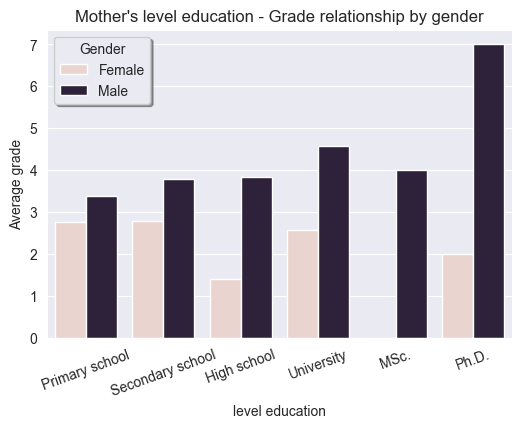

In [20]:
# Mother's level education - grades 

fig = sns.barplot(data=df, x="mo_edu", y= 'grade', hue='gender', ci=None)

plt.title("Mother's level education - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['Primary school', 'Secondary school', 'High school', 
                                     'University', 'MSc.', 'Ph.D.'], rotation=20)
plt.xlabel('level education')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

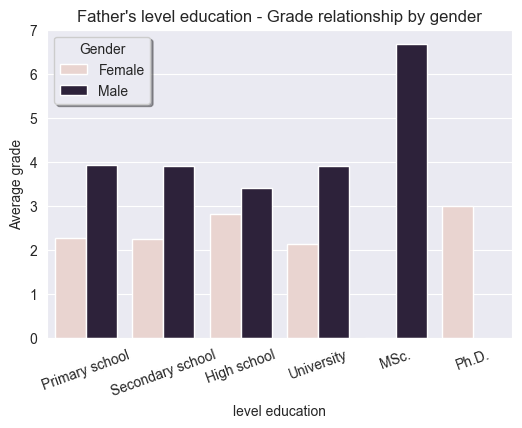

In [21]:
# Father's level education - grades 

fig = sns.barplot(data=df, x="fa_edu", y= 'grade', hue='gender', ci=None)

plt.title("Father's level education - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['Primary school', 'Secondary school', 'High school', 
                                     'University', 'MSc.', 'Ph.D.'], rotation=20)
plt.xlabel('level education')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

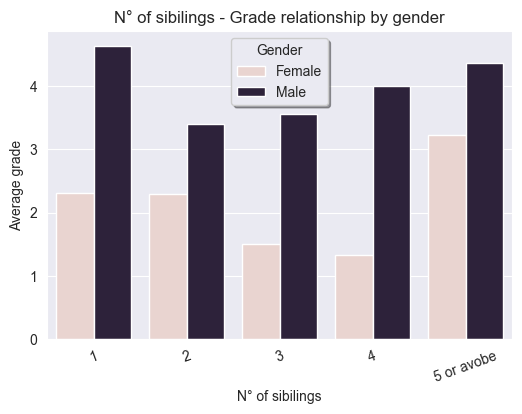

In [22]:
# N° of sibilings level education - grades 

fig = sns.barplot(data=df, x="n_sib", y= 'grade', hue='gender', ci=None)

plt.title("N° of sibilings - Grade relationship by gender")
plt.xticks(np.arange(0, 5, step=1), ['1', '2', '3', 
                                     '4', '5 or avobe'], rotation=20)
plt.xlabel('N° of sibilings')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

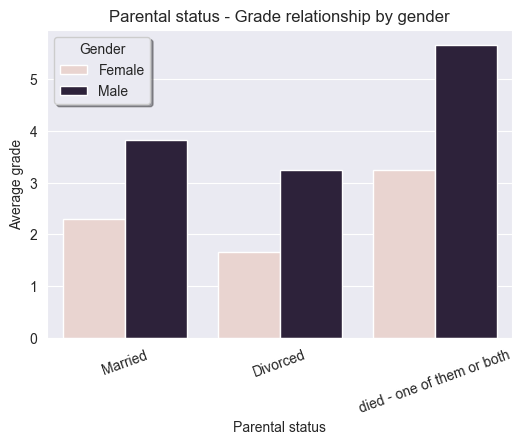

In [23]:
# Parental status - grades 

fig = sns.barplot(data=df, x="p_stus", y= 'grade', hue='gender', ci=None)

plt.title("Parental status - Grade relationship by gender")
plt.xticks(np.arange(0, 3, step=1), ['Married', 'Divorced', 'died - one of them or both'], rotation=20)
plt.xlabel('Parental status')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Occupational Influence

- Does the occupation of the mother or father influence student performance?

In [24]:
df.columns

Index(['id', 'age', 'gender', 'hs_type', 'sch_type', 'work', 'ex_act',
       'partner', 'salary', 'transp', 'acc_type', 'mo_edu', 'fa_edu', 'n_sib',
       'p_stus', 'mo_occ', 'fa_occ', 'w_hours', 'frec_nsci', 'frec_sci',
       'att_sem', 'impact', 'att', 'prep_stus', 'prep_reg', 'notes', 'listng',
       'interest', 'flip', 'cum_s', 'cum_g', 'course_id', 'grade'],
      dtype='object')

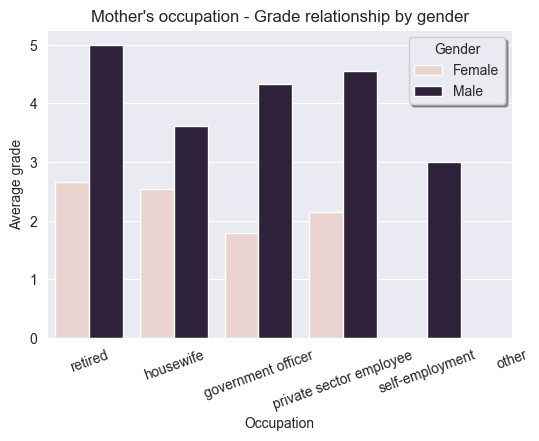

In [25]:
# Mother's occupation - grades 

fig = sns.barplot(data=df, x="mo_occ", y= 'grade', hue='gender', ci=None)

plt.title("Mother's occupation - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['retired', 'housewife', 'government officer', 'private sector employee', 
                                     'self-employment', 'other'], rotation=20)
plt.xlabel('Occupation')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

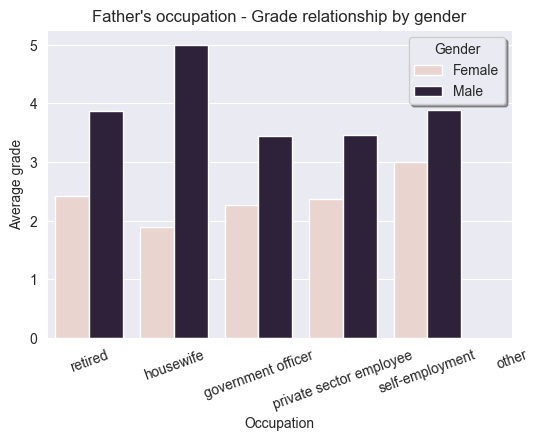

In [26]:
# Father's occupation - grades 

fig = sns.barplot(data=df, x="fa_occ", y= 'grade', hue='gender', ci=None)

plt.title("Father's occupation - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['retired', 'housewife', 'government officer', 'private sector employee', 
                                     'self-employment', 'other'], rotation=20)
plt.xlabel('Occupation')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Reading Habits and Academic Performance

- How do reading habits (frequency of reading non-scientific and scientific materials) correlate with academic performance?  

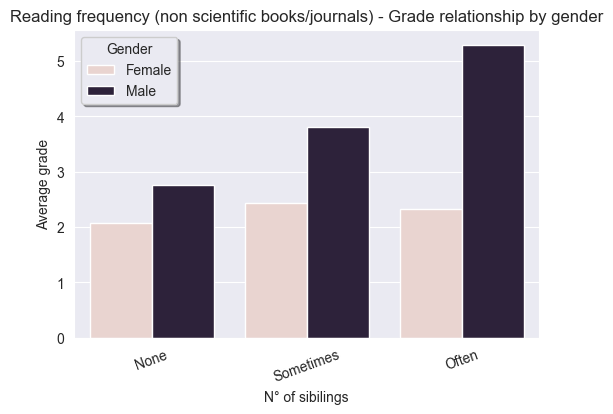

In [27]:
# Reading frequency non scientific - grades 

fig = sns.barplot(data=df, x="frec_nsci", y= 'grade', hue='gender', ci=None)

plt.title("Reading frequency (non scientific books/journals) - Grade relationship by gender")
plt.xticks(np.arange(0, 3, step=1), ['None', 'Sometimes', 'Often'], rotation=20)
plt.xlabel('N° of sibilings')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

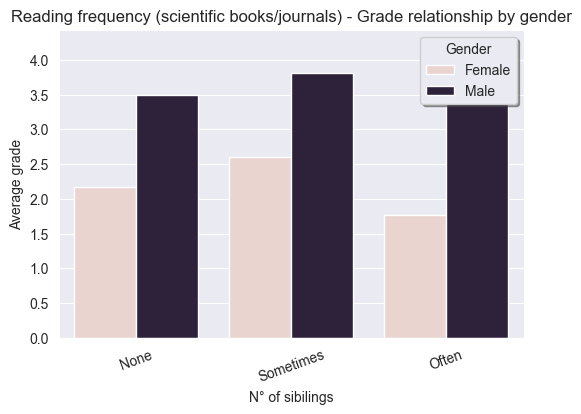

In [28]:
# Reading frequency scientific - grades 

fig = sns.barplot(data=df, x="frec_sci", y= 'grade', hue='gender', ci=None)

plt.title("Reading frequency (scientific books/journals) - Grade relationship by gender")
plt.xticks(np.arange(0, 3, step=1), ['None', 'Sometimes', 'Often'], rotation=20)
plt.xlabel('N° of sibilings')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

In [29]:
df_melt = df.melt(id_vars=['id', 'age', 'gender', 'hs_type', 'sch_type', 'work', 'ex_act',
       'partner', 'salary', 'transp', 'acc_type', 'mo_edu', 'fa_edu', 'n_sib',
       'p_stus', 'mo_occ', 'fa_occ', 'w_hours',
       'att_sem', 'impact', 'att', 'prep_stus', 'prep_reg', 'notes', 'listng',
       'interest', 'flip', 'cum_s', 'cum_g', 'course_id', 'grade'], var_name='frec')

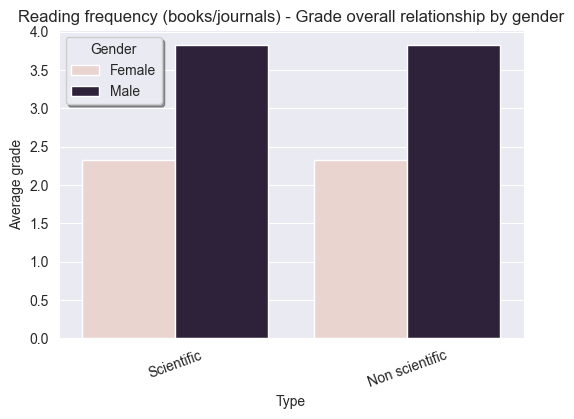

In [30]:
# Reading frequency scientific - grades 

fig = sns.barplot(data=df_melt, x="frec", y= 'grade', hue='gender', ci= None)

plt.title("Reading frequency (books/journals) - Grade overall relationship by gender")
plt.xticks(np.arange(0, 2, step=1), ['Scientific', 'Non scientific'], rotation=20)
plt.xlabel('Type')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

7. Interactions and Multivariate Analysis:

- Are there interactions between different variables that significantly impact academic performance?
- How do combinations of factors (e.g., demographic, lifestyle, family background) affect academic performance?

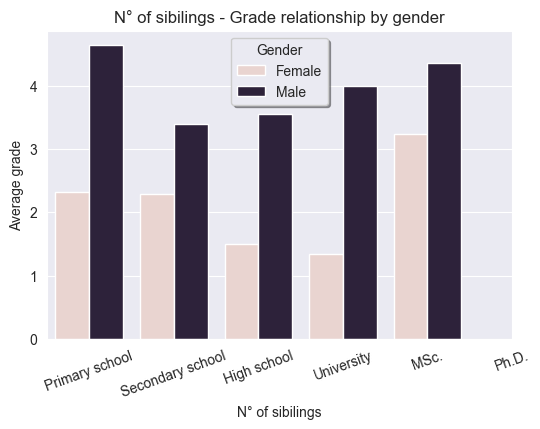

In [31]:
# Mother's level education - grades 

fig = sns.barplot(data=df, x="n_sib", y= 'grade', hue='gender', ci=None)

plt.title("N° of sibilings - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['Primary school', 'Secondary school', 'High school', 
                                     'University', 'MSc.', 'Ph.D.'], rotation=20)
plt.xlabel('N° of sibilings')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

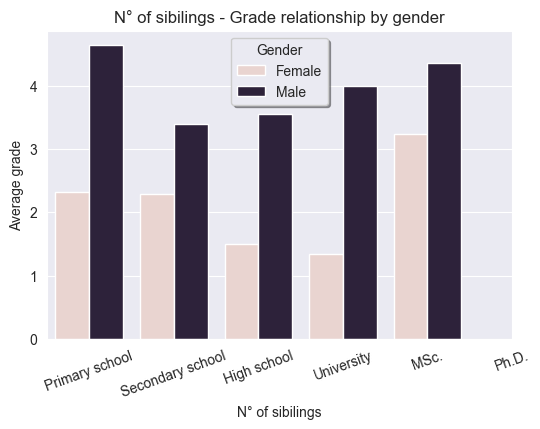

In [32]:
# Mother's level education - grades 

fig = sns.barplot(data=df, x="n_sib", y= 'grade', hue='gender', ci=None)

plt.title("N° of sibilings - Grade relationship by gender")
plt.xticks(np.arange(0, 6, step=1), ['Primary school', 'Secondary school', 'High school', 
                                     'University', 'MSc.', 'Ph.D.'], rotation=20)
plt.xlabel('N° of sibilings')
plt.ylabel('Average grade')
plt.legend(title='Gender', labels = ['Female', 'Male'], shadow=True)
plt.show()

### Train / Test split

In [33]:
X = df.drop(['id', 'grade'], axis=1)
y = df.grade

In [34]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (145, 31)
Shape of y: (145,)


### Best features

Using a Logistic Regresion for feature selection

In [35]:
# Using l1 regularization to shrink the less important feature’s coefficient to zero and discard them

feat_model= LogisticRegression(penalty='l1', solver='liblinear')  
feat_model.fit(X,y)

LogisticRegression(penalty='l1', solver='liblinear')

In [36]:
best_features= pd.DataFrame(data={'feature':X.columns,'relevance':feat_model.coef_[0]})
best_features= best_features.sort_values(by='relevance',ascending=False)

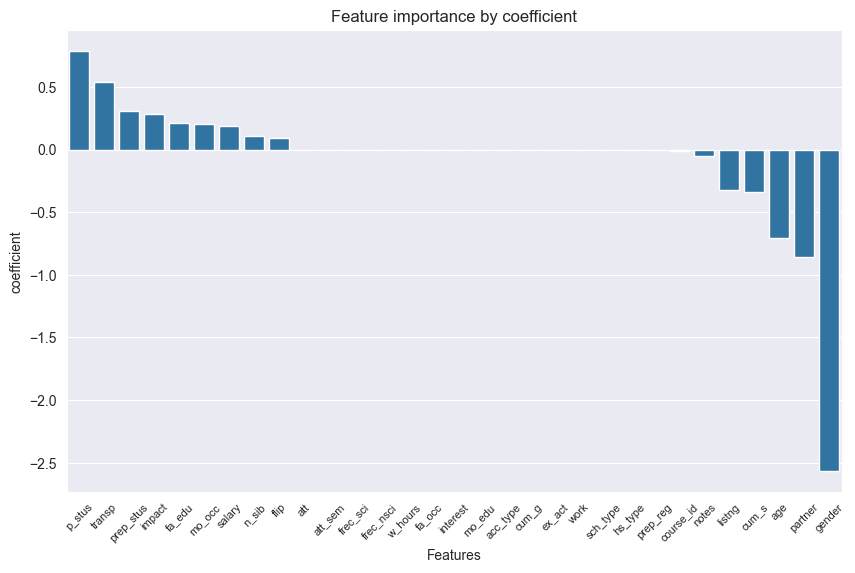

In [37]:
# Features importance

fig = plt.figure(figsize=(10, 6))
fig = sns.barplot(data=best_features, x="feature", y= 'relevance', ci=None)

plt.title("Feature importance by coefficient")
plt.xlabel('Features')
plt.xticks(rotation=45, size=8)
plt.ylabel("coefficient")
#plt.rcParams['font.size'] = 8
plt.show()


In [38]:
best_features

,feature,relevance
13,p_stus,0.787102
8,transp,0.539695
22,prep_stus,0.304319
20,impact,0.283378
11,fa_edu,0.209514
14,mo_occ,0.202108
7,salary,0.185786
12,n_sib,0.105739
27,flip,0.091881
21,att,0.000000


In [39]:
# Choosing features >= 0.1 and <=-0.1 to reduce the final number
df_feat = best_features[(best_features['relevance'] >= 0.1) | (best_features['relevance'] <=-0.1)]

In [40]:
df_feat.shape

(13, 2)

In [41]:
df_feat

,feature,relevance
13,p_stus,0.787102
8,transp,0.539695
22,prep_stus,0.304319
20,impact,0.283378
11,fa_edu,0.209514
14,mo_occ,0.202108
7,salary,0.185786
12,n_sib,0.105739
25,listng,-0.325716
28,cum_s,-0.338035


In [42]:

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01955
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02231
Feature: 4, Score: 0.02921
Feature: 5, Score: 0.02850
Feature: 6, Score: 0.04700
Feature: 7, Score: 0.01352
Feature: 8, Score: 0.05853
Feature: 9, Score: 0.04894
Feature: 10, Score: 0.01217
Feature: 11, Score: 0.03576
Feature: 12, Score: 0.01298
Feature: 13, Score: 0.01552
Feature: 14, Score: 0.02223
Feature: 15, Score: 0.07176
Feature: 16, Score: 0.01739
Feature: 17, Score: 0.02598
Feature: 18, Score: 0.01217
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.02482
Feature: 21, Score: 0.00811
Feature: 22, Score: 0.01483
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.02983
Feature: 25, Score: 0.05737
Feature: 26, Score: 0.02009
Feature: 27, Score: 0.04948
Feature: 28, Score: 0.09132
Feature: 29, Score: 0.01475
Feature: 30, Score: 0.19586


In [43]:
best_features2= pd.DataFrame(data={'feature':X.columns,'relevance':model.feature_importances_})
best_features2= best_features2.sort_values(by='relevance',ascending=False)

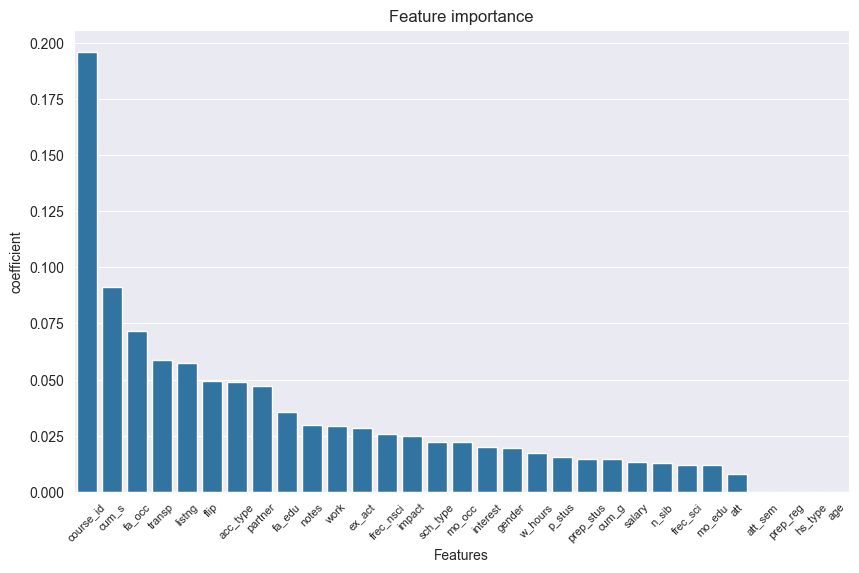

In [44]:
# Features importance

fig = plt.figure(figsize=(10, 6))
fig = sns.barplot(data=best_features2, x="feature", y= 'relevance', ci=None)

plt.title("Feature importance using Decision tree")
plt.xlabel('Features')
plt.xticks(rotation=45, size=8)
plt.ylabel("coefficient")
#plt.rcParams['font.size'] = 8
plt.show()


In [45]:
df_feat2 = best_features2[(best_features2['relevance'] >= 0.04) ]
df_feat2

,feature,relevance
30,course_id,0.195858
28,cum_s,0.091323
15,fa_occ,0.071762
8,transp,0.058531
25,listng,0.057375
27,flip,0.049479
9,acc_type,0.048942
6,partner,0.046995


In [46]:
df_feat2.feature.shape

(8,)

In [47]:
df_feat.feature.values

array(['p_stus', 'transp', 'prep_stus', 'impact', 'fa_edu', 'mo_occ',
       'salary', 'n_sib', 'listng', 'cum_s', 'age', 'partner', 'gender'],
      dtype=object)

In [48]:
df_feat2.feature.values

array(['course_id', 'cum_s', 'fa_occ', 'transp', 'listng', 'flip',
       'acc_type', 'partner'], dtype=object)

In [49]:
X = df[['course_id', 'cum_s', 'fa_occ', 'mo_edu', 'prep_stus', 'notes',
       'listng', 'flip', 'acc_type']]
y = df['grade']

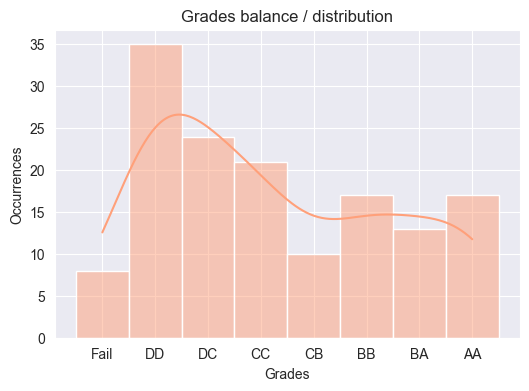

In [50]:
# Grade distribuition

sns.histplot(y, bins=8, color='lightsalmon', discrete=True,kde=True)

plt.title('Grades balance / distribution')
plt.xlabel('Grades')
plt.ylabel('Occurrences')
plt.xticks(np.arange(0, 8, step=1), ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA'])

plt.show()

In [ ]:
y.value_counts()

grade
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64

### Predicting if students will pass or fail

#### Creating binary target

In [101]:
# Mapping grades as a binary output: 0= Fail, 1= Pass

y = y.map({0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1})

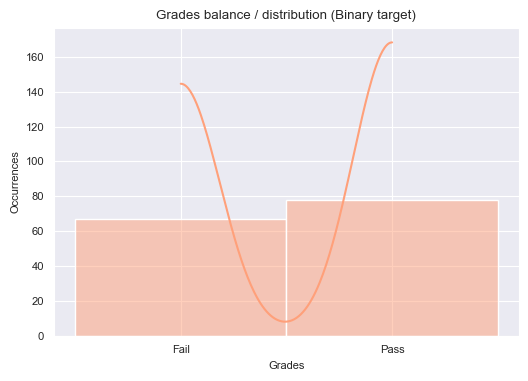

In [288]:
# Grade distribuition

sns.histplot(y, bins=2, color='lightsalmon', discrete=True,kde=True)

plt.title('Grades balance / distribution (Binary target)')
plt.xlabel('Grades')
plt.ylabel('Occurrences')
plt.xticks(np.arange(0, 2, step=1), ['Fail', 'Pass'])

plt.show()

In [289]:
# Data split with new y values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RSEED)

In [260]:
# Oversampling data

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=200, n_features=10,
                           n_classes=2, n_informative=4,
                           random_state=RSEED)
sm = SMOTE(random_state=RSEED)
X_train, y_train = sm.fit_resample(X_train, y_train)

X_test, y_test = make_classification(n_samples=40,n_features=10,
                           n_classes=2, n_informative=4,
                           random_state=RSEED)
sm = SMOTE(random_state=RSEED)
X_test, y_test = sm.fit_resample(X_test, y_test)

from collections import Counter
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_test).items()))

[(0, 102), (1, 102)]
[(0, 20), (1, 20)]


In [261]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (204, 10)
X_test shape: (40, 10)
y_train shape: (204,)
y_test shape: (40,)


### Logistic regression as baseline model

In [290]:
# Create a logistic regression model

baseline_lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=RSEED) 


In [291]:
# Train the model
baseline_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [292]:
# Make predictions on the test set
y_pred = baseline_lr.predict(X_test)

In [293]:
# Predicting on train data 
y_train_pred = baseline_lr.predict(X_train)

# Testing predictions (to determine performance)
y_pred = baseline_lr.predict(X_test)

### Results on Training data

Accuracy : 0.72
Recall : 0.81
Precision: 0.70
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.61      0.67        54
           1       0.70      0.81      0.75        62

    accuracy                           0.72       116
   macro avg       0.72      0.71      0.71       116
weighted avg       0.72      0.72      0.71       116



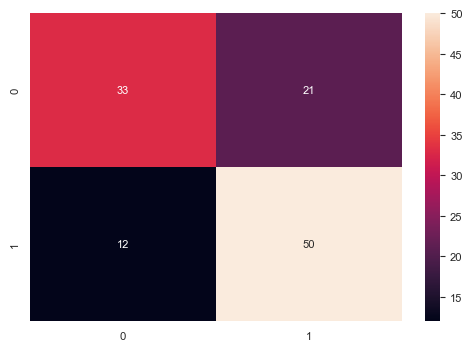

In [294]:
print('Accuracy : {:.2f}'.format(accuracy_score(y_train, y_train_pred, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_train, y_train_pred)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_pred)))
print('------'*10)
print(f'Classification Report: {classification_report(y_train, y_train_pred)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt = 'd')
plt.rcParams['font.size'] = 8

plt.show()

### Results on Test data

Accuracy : 0.59
Recall : 0.59
Precision: 0.58
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.61      0.69      0.65        16

    accuracy                           0.59        29
   macro avg       0.58      0.57      0.57        29
weighted avg       0.58      0.59      0.58        29



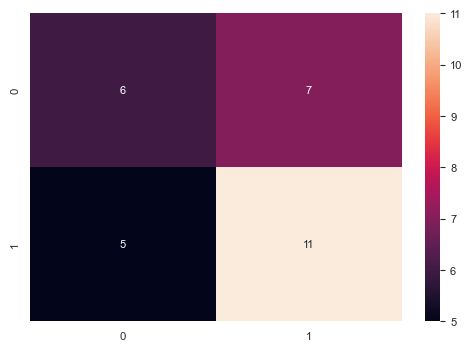

In [295]:
#
# Printing results
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='weighted')))
print('------'*10)
print(f'Classification Report: {classification_report(y_test, y_pred)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = 'd')
plt.rcParams['font.size'] = 8

plt.show()

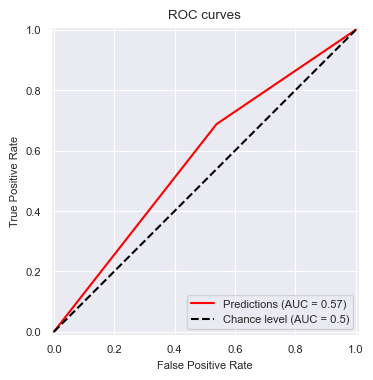

In [296]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred,
    name="Predictions",
    color="red",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curves")

As espected, the results are better on training set that on test set, but the differences aren't that huge

### Training a random forest model

In [297]:
# Checking the best ccp_alpha values

dt = DecisionTreeClassifier()

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
print(ccp_alphas[9])
print(ccp_alphas[10])
print(ccp_alphas[8])
print(ccp_alphas[11])

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06960731456931646
0.011083743842364529
0.013061650992685473
0.00957854406130268
0.01724137931034482


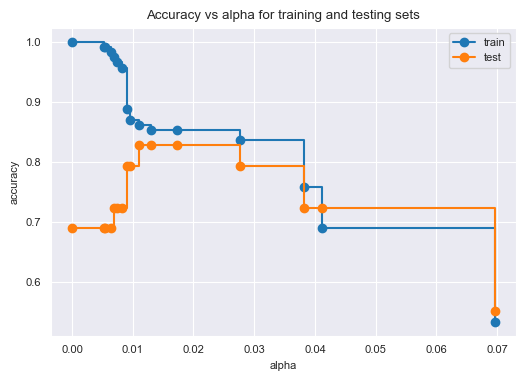

In [298]:
# Plotting the best ccp_alpha values

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [299]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])


In [320]:
param_rf = {
                'rf__n_estimators': [100],
                'rf__max_features': ['sqrt'],
                'rf__max_depth': [2, 4, 6],
                'rf__max_leaf_nodes':[20, 25, 30, 35, 40],
                'rf__ccp_alpha':[0.011, 0.013, 0.014, 0.017],
                'rf__random_state': [RSEED],
                'rf__criterion': ['gini'],
                'rf__bootstrap': [False],
               }


grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=5, scoring= ['recall', 'precision', 'accuracy'], 
                           refit='accuracy', verbose=5, n_jobs=-1)

In [321]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [False],
                         'rf__ccp_alpha': [0.011, 0.013, 0.014, 0.017],
                         'rf__criterion': ['gini'], 'rf__max_depth': [2, 4, 6],
                         'rf__max_features': ['sqrt'],
                         'rf__max_leaf_nodes': [20, 25, 30, 35, 40],
                         'rf__n_estimators': [100], 'rf__random_state': [42]},
             refit='accuracy', scoring=['recall', 'precision', 'accuracy'],
             verbose=5)

In [322]:
print('Best score:\n{:.2f}'.format(grid_rf.best_score_))
print("Best parameters:\n{}".format(grid_rf.best_params_))

Best score:
0.78
Best parameters:
{'rf__bootstrap': False, 'rf__ccp_alpha': 0.013, 'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': 20, 'rf__n_estimators': 100, 'rf__random_state': 42}


In [323]:
best_model_rf = grid_rf.best_estimator_
best_model_rf

Pipeline(steps=[('rf',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.013,
                                        max_depth=4, max_leaf_nodes=20,
                                        random_state=42))])

In [324]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = best_model_rf.predict(X_train)

# Testing predictions (to determine performance)
rf_predictions = best_model_rf.predict(X_test)

### Results on Training set

Accuracy : 0.89
Recall : 0.85
Precision: 0.93
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.93      0.85      0.89        62

    accuracy                           0.89       116
   macro avg       0.89      0.89      0.89       116
weighted avg       0.89      0.89      0.89       116



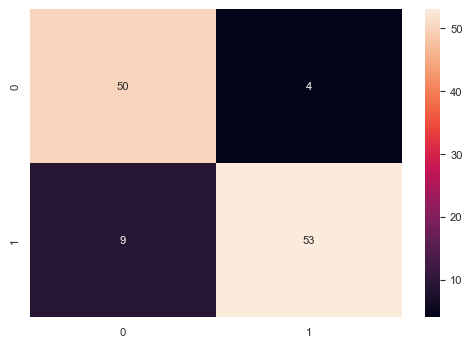

In [325]:
# Printing results

print('Accuracy : {:.2f}'.format(accuracy_score(y_train, train_rf_predictions, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_train, train_rf_predictions)))
print("Precision: {:.2f}".format(precision_score(y_train, train_rf_predictions)))
print('------'*10)
print(f'Classification Report: {classification_report(y_train, train_rf_predictions)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train, train_rf_predictions), annot=True, fmt = 'd')

plt.rcParams['font.size'] = 8

plt.show()

### Results on test set

Accuracy : 0.79
Recall : 0.69
Precision: 0.92
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.92      0.69      0.79        16

    accuracy                           0.79        29
   macro avg       0.81      0.81      0.79        29
weighted avg       0.82      0.79      0.79        29



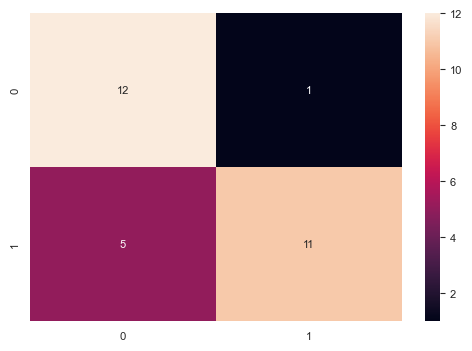

In [326]:
# Printing results

print('Accuracy : {:.2f}'.format(accuracy_score(y_test, rf_predictions, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_test, rf_predictions)))
print("Precision: {:.2f}".format(precision_score(y_test, rf_predictions)))
print('------'*10)
print(f'Classification Report: {classification_report(y_test, rf_predictions)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt = 'd')

plt.rcParams['font.size'] = 8

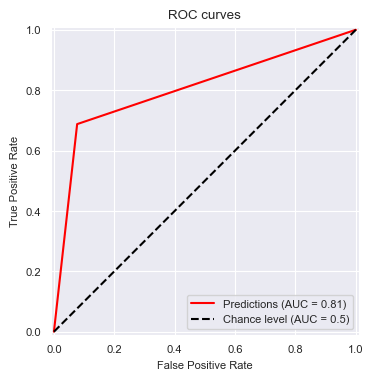

In [327]:

display = RocCurveDisplay.from_predictions(
    y_test,
    rf_predictions,
    name="Predictions",
    color="red",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curves")

### Training a SVM model

In [328]:
from sklearn import svm 

In [384]:
#Create a svm Classifier
svm_classifier= svm.SVC(kernel='sigmoid', gamma='scale')

#Train the model
svm_classifier_model=svm_classifier.fit(X_train, y_train)


In [385]:
# Training predictions (to demonstrate overfitting)
svm_train_predictions = svm_classifier_model.predict(X_train)

# Testing predictions (to evaluate performance)
svm_predictions = svm_classifier_model.predict(X_test)

Accuracy : 0.53
Recall : 1.00
Precision: 0.53
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.53      1.00      0.70        62

    accuracy                           0.53       116
   macro avg       0.27      0.50      0.35       116
weighted avg       0.29      0.53      0.37       116



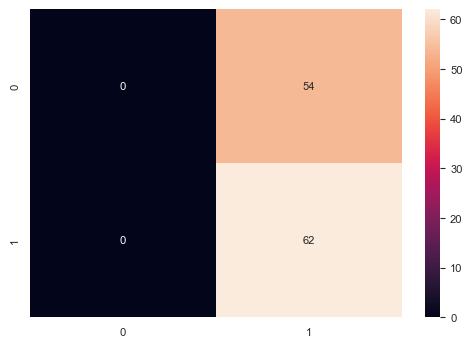

In [386]:
# Printing results

print('Accuracy : {:.2f}'.format(accuracy_score(y_train, svm_train_predictions, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_train, svm_train_predictions)))
print("Precision: {:.2f}".format(precision_score(y_train, svm_train_predictions)))
print('------'*10)
print(f'Classification Report: {classification_report(y_train, svm_train_predictions)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train, svm_train_predictions), annot=True, fmt = 'd')

plt.show()

#### Results on test data

Accuracy : 0.55
Recall : 1.00
Precision: 0.55
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      1.00      0.71        16

    accuracy                           0.55        29
   macro avg       0.28      0.50      0.36        29
weighted avg       0.30      0.55      0.39        29



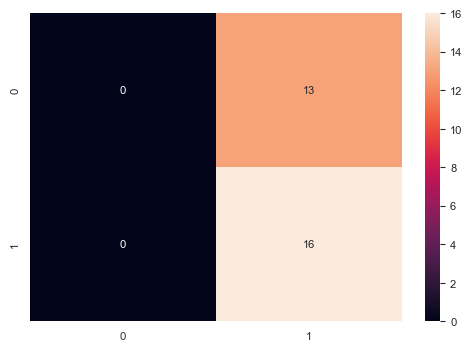

In [387]:
# Printing results

print('Accuracy : {:.2f}'.format(accuracy_score(y_test, svm_predictions, normalize=True)))
print('Recall : {:.2f}'.format(recall_score(y_test, svm_predictions)))
print("Precision: {:.2f}".format(precision_score(y_test, svm_predictions)))
print('------'*10)
print(f'Classification Report: {classification_report(y_test, svm_predictions)}') 

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt = 'd')

plt.show()

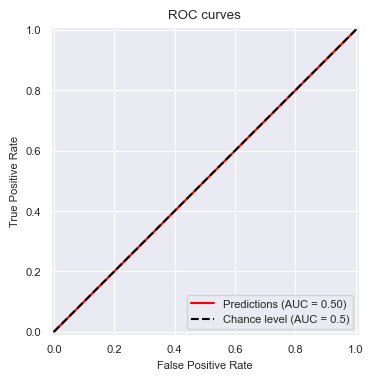

In [312]:

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test,
    svm_predictions,
    name="Predictions",
    color="red",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curves")